In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bangladesh=pd.read_csv('Bangladesh.csv')

In [3]:
bangladesh

,Observation Date,Country,Confirmed,Death,Recovered
0,03-08-2020,Bangladesh,3,0,0
1,03-09-2020,Bangladesh,3,0,0
2,03-10-2020,Bangladesh,3,0,0
3,03-11-2020,Bangladesh,3,0,0
4,03-12-2020,Bangladesh,3,0,0
...,...,...,...,...,...
443,05/25/2021,Bangladesh,792196,12441,732810
444,05/26/2021,Bangladesh,793693,12458,733866
445,05/27/2021,Bangladesh,794985,12480,735157
446,05/28/2021,Bangladesh,796343,12511,736221


In [4]:
bangladesh.describe()

,Confirmed,Death,Recovered
count,448.000000,448.000000,448.000000
mean,360479.488839,5288.479911,296835.031250
std,242330.438129,3698.524733,229417.213053
min,3.000000,0.000000,0.000000
25%,136834.750000,1727.250000,55374.750000
50%,387932.000000,5653.000000,303135.000000
75%,537843.000000,8193.750000,482973.750000
max,797386.000000,12549.000000,737408.000000


In [5]:
# Assuming 'china' is your DataFrame
bangladesh['Observation Date'] = pd.to_datetime(bangladesh['Observation Date'], errors='coerce', infer_datetime_format=True)

# Create a new column 'Month' with the month extracted from 'Observation Date'
bangladesh['Month'] = bangladesh['Observation Date'].dt.month

# Now, 'Observation Date' is kept in the dataframe, and 'Month' is added
print(bangladesh)

    Observation Date     Country  Confirmed  Death  Recovered  Month
0         2020-03-08  Bangladesh          3      0          0    3.0
1         2020-03-09  Bangladesh          3      0          0    3.0
2         2020-03-10  Bangladesh          3      0          0    3.0
3         2020-03-11  Bangladesh          3      0          0    3.0
4         2020-03-12  Bangladesh          3      0          0    3.0
..               ...         ...        ...    ...        ...    ...
443              NaT  Bangladesh     792196  12441     732810    NaN
444              NaT  Bangladesh     793693  12458     733866    NaN
445              NaT  Bangladesh     794985  12480     735157    NaN
446              NaT  Bangladesh     796343  12511     736221    NaN
447              NaT  Bangladesh     797386  12549     737408    NaN

[448 rows x 6 columns]


C:\Users\aryan\AppData\Local\Temp\ipykernel_4580\3937961204.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  bangladesh['Observation Date'] = pd.to_datetime(bangladesh['Observation Date'], errors='coerce', infer_datetime_format=True)


In [6]:
# Store the modified data in a new DataFrame named 'India_new'
bangladesh_new = bangladesh.copy()

# Display the resulting DataFrame
print(bangladesh_new)

    Observation Date     Country  Confirmed  Death  Recovered  Month
0         2020-03-08  Bangladesh          3      0          0    3.0
1         2020-03-09  Bangladesh          3      0          0    3.0
2         2020-03-10  Bangladesh          3      0          0    3.0
3         2020-03-11  Bangladesh          3      0          0    3.0
4         2020-03-12  Bangladesh          3      0          0    3.0
..               ...         ...        ...    ...        ...    ...
443              NaT  Bangladesh     792196  12441     732810    NaN
444              NaT  Bangladesh     793693  12458     733866    NaN
445              NaT  Bangladesh     794985  12480     735157    NaN
446              NaT  Bangladesh     796343  12511     736221    NaN
447              NaT  Bangladesh     797386  12549     737408    NaN

[448 rows x 6 columns]


In [7]:
bangladesh=bangladesh.drop(columns=['Month'])

In [13]:
# Create a mapping of month numbers to seasons
season_mapping = {
    3: 'Winter',
    4: 'Winter',
    5: 'Summer',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Summer',
    10: 'Monsoon',
    11: 'Monsoon',
    12: 'Monsoon',
    1: 'Winter',
    2: 'Winter'
}

# Map the month numbers to seasons and create a new 'Seasons' column
bangladesh_new['Seasons'] = bangladesh_new['Month'].map(season_mapping)

# Display the DataFrame with the new 'Seasons' column
print(bangladesh_new)

    Observation Date     Country  Confirmed  Death  Recovered  Month Seasons  \
0         2020-03-08  Bangladesh          3      0          0    3.0  Winter   
1         2020-03-09  Bangladesh          3      0          0    3.0  Winter   
2         2020-03-10  Bangladesh          3      0          0    3.0  Winter   
3         2020-03-11  Bangladesh          3      0          0    3.0  Winter   
4         2020-03-12  Bangladesh          3      0          0    3.0  Winter   
..               ...         ...        ...    ...        ...    ...     ...   
443              NaT  Bangladesh     792196  12441     732810    NaN     NaN   
444              NaT  Bangladesh     793693  12458     733866    NaN     NaN   
445              NaT  Bangladesh     794985  12480     735157    NaN     NaN   
446              NaT  Bangladesh     796343  12511     736221    NaN     NaN   
447              NaT  Bangladesh     797386  12549     737408    NaN     NaN   

     Active  
0         3  
1         3

In [14]:
bangladesh_new.head()

,Observation Date,Country,Confirmed,Death,Recovered,Month,Seasons,Active
0,2020-03-08,Bangladesh,3,0,0,3.0,Winter,3
1,2020-03-09,Bangladesh,3,0,0,3.0,Winter,3
2,2020-03-10,Bangladesh,3,0,0,3.0,Winter,3
3,2020-03-11,Bangladesh,3,0,0,3.0,Winter,3
4,2020-03-12,Bangladesh,3,0,0,3.0,Winter,3


In [15]:
# Convert 'Observation Date' column to datetime format
bangladesh_new['Observation Date'] = pd.to_datetime(bangladesh_new['Observation Date'])

# Calculate active cases and add a new column 'Active'
bangladesh_new['Active'] = bangladesh_new['Confirmed'] - bangladesh_new['Death'] - bangladesh_new['Recovered']

# Now, 'Active' column is added with the active cases information
print(bangladesh_new)

    Observation Date     Country  Confirmed  Death  Recovered  Month Seasons  \
0         2020-03-08  Bangladesh          3      0          0    3.0  Winter   
1         2020-03-09  Bangladesh          3      0          0    3.0  Winter   
2         2020-03-10  Bangladesh          3      0          0    3.0  Winter   
3         2020-03-11  Bangladesh          3      0          0    3.0  Winter   
4         2020-03-12  Bangladesh          3      0          0    3.0  Winter   
..               ...         ...        ...    ...        ...    ...     ...   
443              NaT  Bangladesh     792196  12441     732810    NaN     NaN   
444              NaT  Bangladesh     793693  12458     733866    NaN     NaN   
445              NaT  Bangladesh     794985  12480     735157    NaN     NaN   
446              NaT  Bangladesh     796343  12511     736221    NaN     NaN   
447              NaT  Bangladesh     797386  12549     737408    NaN     NaN   

     Active  
0         3  
1         3

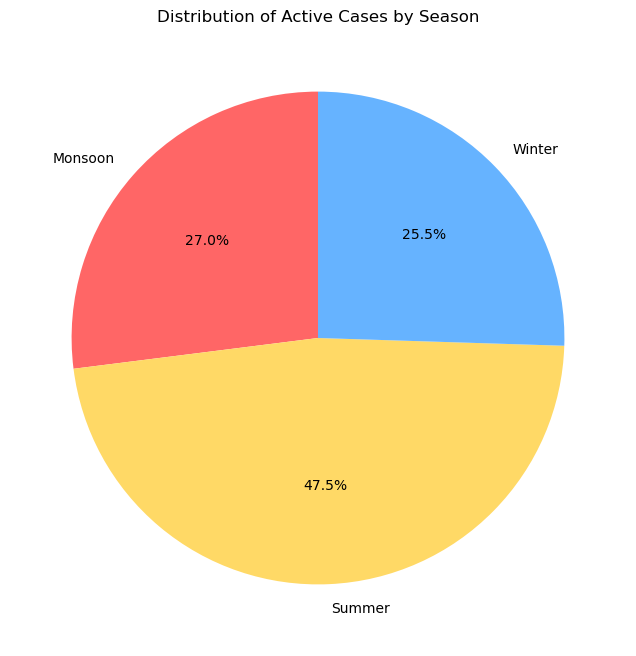

In [16]:
seasonal_active = bangladesh_new.groupby('Seasons')['Active'].sum()

# Custom bright and dark color palette
colors = ['#ff6666', '#ffd966', '#66b3ff', '#99ff99']

# Create a pie chart with the custom color palette
plt.figure(figsize=(8, 8))
plt.pie(seasonal_active, labels=seasonal_active.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Active Cases by Season')
plt.show()

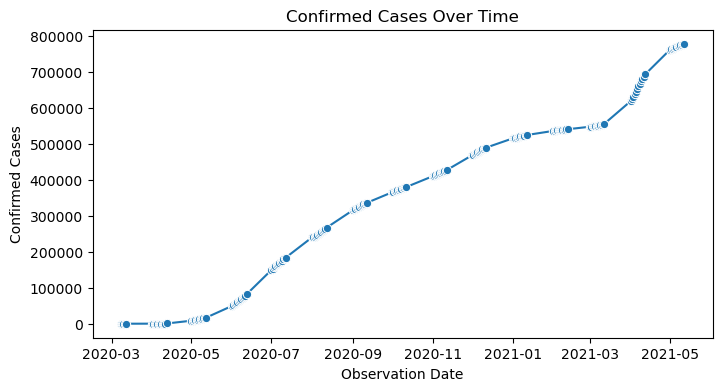

In [18]:
# Plot 1: Confirmed cases over time
plt.figure(figsize=(8,4))
sns.lineplot(x='Observation Date', y='Confirmed', data=bangladesh_new, marker='o')
plt.title('Confirmed Cases Over Time')
plt.xlabel('Observation Date')
plt.ylabel('Confirmed Cases')
plt.show()

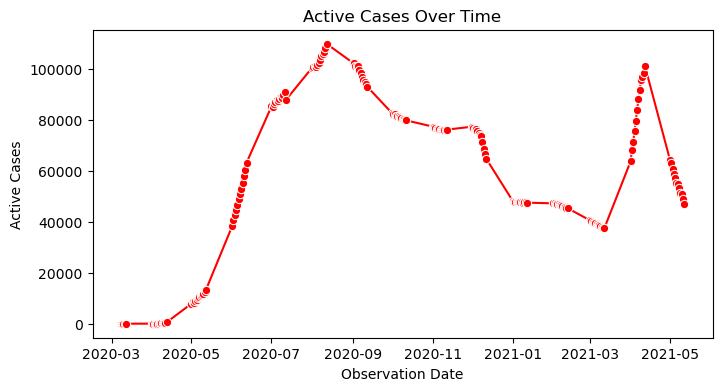

In [19]:
# Plot 2: Active cases over time
plt.figure(figsize=(8, 4))
sns.lineplot(x='Observation Date', y='Active', data=bangladesh_new, marker='o', color='red')
plt.title('Active Cases Over Time')
plt.xlabel('Observation Date')
plt.ylabel('Active Cases')
plt.show()

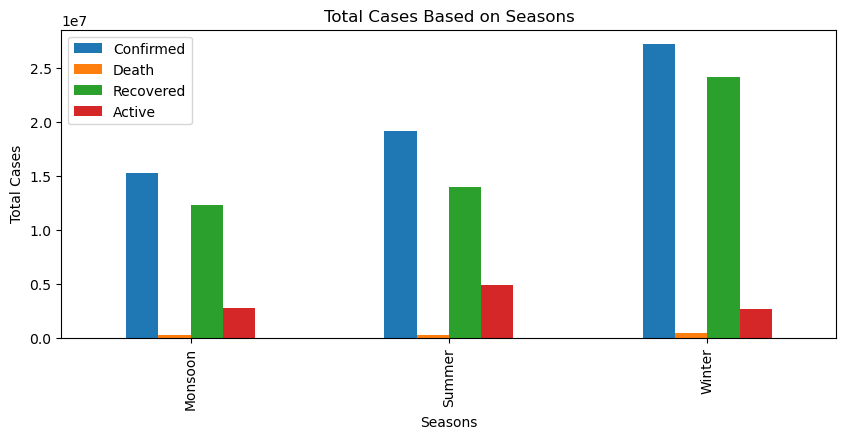

In [20]:
# Plot 1: Bar chart for Confirmed, Death, Recovered, and Active cases based on seasons
fig, ax = plt.subplots(figsize=(10, 4))
bangladesh_new.groupby('Seasons')[['Confirmed', 'Death', 'Recovered', 'Active']].sum().plot(kind='bar', ax=ax)
plt.title('Total Cases Based on Seasons')
plt.xlabel('Seasons')
plt.ylabel('Total Cases')
plt.show()